### Question 1: Use yfinance to Extract Stock Data

In [41]:
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index, save, and display first five rows
tesla_data.reset_index(inplace=True)
print("Tesla Data - First 5 Rows:")
tesla_data.head()

Tesla Data - First 5 Rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

In [39]:
# --- Tesla Revenue ---
import pandas as pd
import requests
from bs4 import BeautifulSoup

tesla_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(tesla_url).text
soup = BeautifulSoup(html_data, 'html.parser')

tesla_data = []
for row in soup.find_all('tbody')[1].find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_data.append({'Date': date, 'Revenue': revenue})

tesla_revenue = pd.DataFrame(tesla_data)

# Remove linhas com valores ausentes
tesla_revenue.dropna(inplace=True)

# Mostra as últimas 5 linhas
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


### Question 3: Use yfinance to Extract GME Stock Data

In [16]:
import yfinance as yf

# Extract Tesla stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index, save, and display first five rows
gme_data.reset_index(inplace=True)
print("GME - First 5 Rows:")
gme_data.head()

GME - First 5 Rows:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

In [40]:
# --- GME Revenue ---
gme_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(gme_url).text
soup = BeautifulSoup(html_data, 'html.parser')

gme_data = []
for row in soup.find_all('tbody')[1].find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_data.append({'Date': date, 'Revenue': revenue})

gme_revenue = pd.DataFrame(gme_data)

# Remove linhas com valores ausentes
gme_revenue.dropna(inplace=True)

# Mostra as últimas 5 linhas
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


### Question 5: Plot Tesla Stock Graph

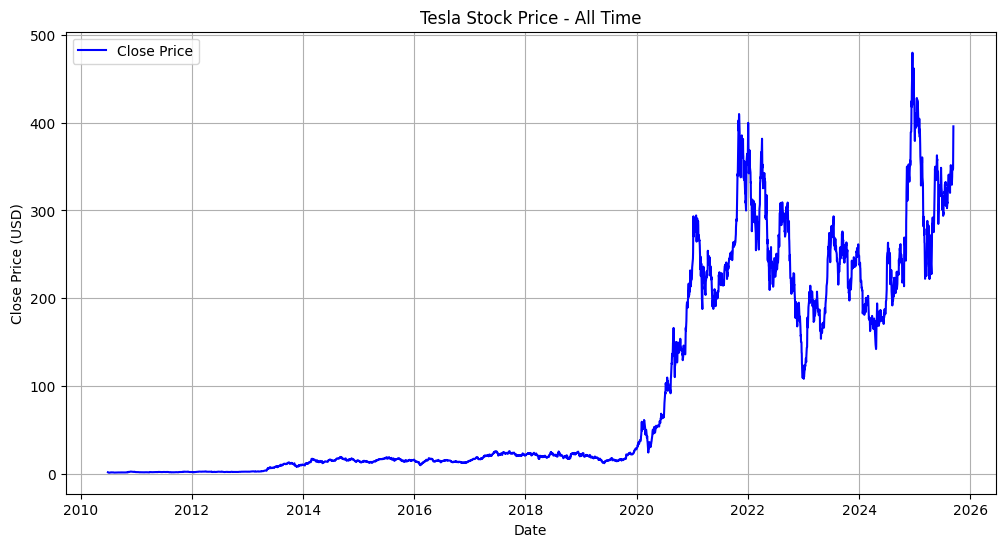

In [17]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title="Stock Price Graph"):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, title="Tesla Stock Price - All Time")

### Question 6: Plot GameStop Stock Graph

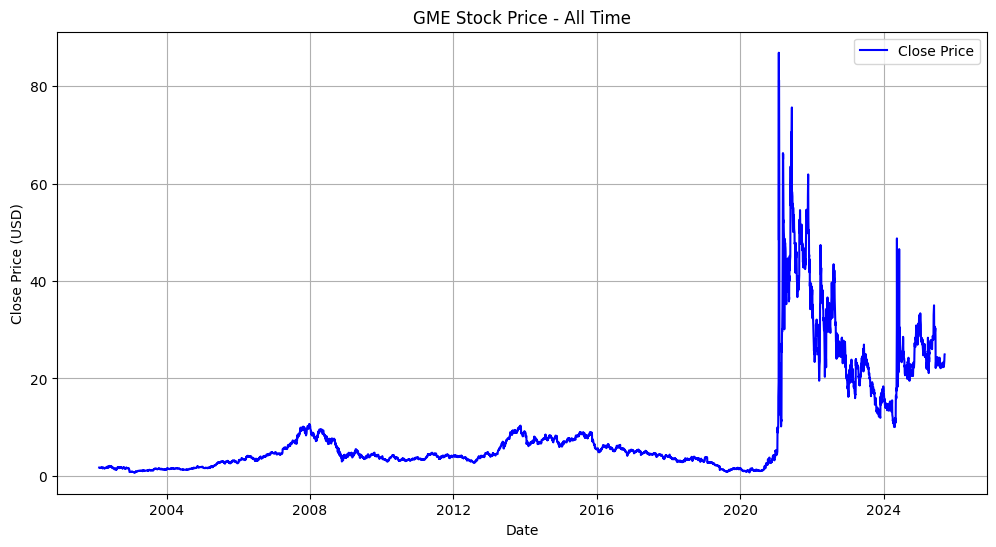

In [18]:
make_graph(gme_data, title="GME Stock Price - All Time")